In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import os
from model_structure import get_preprocessing_transforms,get_resnet_model,BCNN, train_model, evaluate_model

In [3]:
INPUT_SIZE = 224
BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Get transforms
train_transform, val_transform = get_preprocessing_transforms(INPUT_SIZE)

test_data_1_dir = 'data4model_1/test/'
test_data_2_dir = 'data4model_2/test/'
train_data_1_dir = 'data4model_1/train/'
train_data_2_dir = 'data4model_2/train/'

# Load data set
dataset_test_1 = datasets.ImageFolder(test_data_1_dir,transform=val_transform)
dataset_train_1 = datasets.ImageFolder(train_data_1_dir,transform=val_transform)
dataset_test_2 = datasets.ImageFolder(test_data_2_dir,transform=val_transform)
dataset_train_2 = datasets.ImageFolder(train_data_2_dir,transform=val_transform)
additional_set = datasets.ImageFolder('data4model_1/for_extra_test/',transform=val_transform)



additional_loader = DataLoader(additional_set, shuffle=False, batch_size=BATCH_SIZE)
test_loader_1 = DataLoader(dataset_test_1, shuffle=False, batch_size=BATCH_SIZE)
train_loader_1 = DataLoader(dataset_train_1, shuffle=False, batch_size=BATCH_SIZE)
test_loader_2 = DataLoader(dataset_test_2, shuffle=False, batch_size=BATCH_SIZE)
train_loader_2 = DataLoader(dataset_train_2, shuffle=False, batch_size=BATCH_SIZE)

dataSets =  {"Model_1:Train": train_loader_1,
        "Model_1:Test": test_loader_1,
        "Model_2:Train": train_loader_2,
        "Model_2:Test": test_loader_2,
        "Model_1:additional_set": additional_loader
        }

In [5]:
# model_1_dir = 'my_models/best_model_1.pth'
# model_2_dir = 'my_models/best_model_2.pth'
model_info = "pretrained" # "my" or "new"
model_1_dir = 'best_model_1.pth'
model_2_dir = 'best_model_2.pth'

In [6]:
# Load the model
# model_1 = BCNN().to(DEVICE)
model_1 = get_resnet_model(2).to(DEVICE)
weights = torch.load(model_1_dir, map_location=torch.device(DEVICE))
model_1.load_state_dict(weights)
model_1.eval()

#model_2 = BCNN().to(DEVICE)
model_2 = get_resnet_model(2).to(DEVICE)
weights = torch.load(model_2_dir, map_location=torch.device(DEVICE))
model_2.load_state_dict(weights)
model_2.eval()

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\hskay\AppData\Local\Temp\ipykernel_10224\1659288269.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
for key in dataSets:
    print(key)
    if "Model_1" in key:
        model = model_1
    else:
        model = model_2
    
    results = evaluate_model(model.to(DEVICE), dataSets[key], DEVICE)
    print("Accuracy: ", results[0])
    print("F1 Score: ", results[1])
    print("confusion Matrix: \n",results[3])
    print("\n")

Model_1:Train
Accuracy:  0.9533333333333334
F1 Score:  0.9526707234617985
confusion Matrix: 
 [[1451   49]
 [  91 1409]]


Model_1:Test
Accuracy:  0.95
F1 Score:  0.9489795918367347
confusion Matrix: 
 [[97  3]
 [ 7 93]]


Model_2:Train
Accuracy:  0.985
F1 Score:  0.9848841115216661
confusion Matrix: 
 [[1489   11]
 [  34 1466]]


Model_2:Test
Accuracy:  0.965
F1 Score:  0.9644670050761421
confusion Matrix: 
 [[98  2]
 [ 5 95]]


Model_1:additional_set
Accuracy:  0.9071830106183635
F1 Score:  0.9045845640169513
confusion Matrix: 
 [[3740  260]
 [ 483 3522]]




In [8]:
K_ROUND = 50  # Number of rounds to monitor
activation_values = {"Model_1":{},
                     "Model_2":{}}



In [9]:
activation_values = {"Model_1": {}, "Model_2": {}}

def register_hooks(model, model_name):
    activation_values[model_name] = {}
    hooks = []
    
    def get_hook(name):
        def hook(module, input, output):
            # Store input, output, weights and biases
            activation_values[model_name][name] = {
                'input': input[0].detach(),
                'output': output.detach(),
                'weight': module.weight.detach() if hasattr(module, 'weight') else None,
                'bias': module.bias.detach() if hasattr(module, 'bias') and module.bias is not None else None,
            }
            if isinstance(module, nn.Conv2d):
                activation_values[model_name][name]['conv_params'] = {
                    'kernel_size': module.kernel_size[0] if isinstance(module.kernel_size, tuple) else module.kernel_size,
                    'padding': module.padding[0] if isinstance(module.padding, tuple) else module.padding,
                    'stride': module.stride[0] if isinstance(module.stride, tuple) else module.stride,
                    'dilation': module.dilation[0] if isinstance(module.dilation, tuple) else module.dilation
                }
        return hook
    
    for name, module in model.named_modules():
        if isinstance(module, (nn.Conv2d, nn.Linear)):
            hooks.append(module.register_forward_hook(get_hook(name)))
    
    return hooks

In [10]:
def select_random_neuron_indices(activations, n_neurons=1):
    indices = {}
    
    for layer_name, layer_data in activations.items():
        # skipping if layer without weight
        if not isinstance(layer_data, dict) or 'output' not in layer_data:
            continue
            
        # activation output and flatten it
        activation = layer_data['output']
        flattened = activation.view(activation.shape[0], -1)
        
        # positive (activated) indices
        positive_indices = np.where(flattened.cpu().numpy().squeeze() > 0)[0]
        
        # skipping if no activated neurons
        if len(positive_indices) == 0:
            continue
            
        # random neurons from activated ones
        selected_indices = np.random.choice(
            positive_indices,
            size=min(n_neurons, len(positive_indices)),
            replace=False
        )
        
        # storing selected indices
        indices[layer_name] = {
            'neuron_idx': selected_indices,
            'all_activated_indices': positive_indices,
            'original_shape': activation.shape
        }
    
    return indices

In [11]:
def compare_model_activations(model1_activations, model2_activations, selected_indices):
    comparison_results = {}
    
    for layer_name, indices_info in selected_indices.items():
        if layer_name not in model1_activations or layer_name not in model2_activations:
            continue
        
        data1 = model1_activations[layer_name]
        data2 = model2_activations[layer_name]
        
        if not isinstance(data1, dict) or not isinstance(data2, dict):
            continue
        
        selected_indices = indices_info['neuron_idx']
        original_shape = indices_info.get('original_shape', data1['output'].shape)
        
        # get inputs, weights, biases, and stored outputs
        input1 = data1['input']
        weights1 = data1['weight']
        bias1 = data1.get('bias')
        weights2 = data2['weight']
        bias2 = data2.get('bias')
        stored_output1 = data1['output']
    
        layer_results = {
            'neuron_comparisons': [],
            'model1_verification_errors': [],
            'cross_model_differences': [],
            'model1_activation_value':[],
            'model2_activation_value':[]
        }
        
        for idx in selected_indices:
            if len(weights1.shape) == 4:
                # dimensions: batch_size, channels, height, width
                batch_size, channels, height, width = original_shape
                
                # converting flat idx to corresponding coordinates
                channel = idx // (height * width)
                pos_in_channel = idx % (height * width)
                h_idx = pos_in_channel // width
                w_idx = pos_in_channel % width
                
                # remove try it is for debugging
                if channel >= stored_output1.shape[1]:
                    continue
                
                # get stored activation for this position
                stored_activation = stored_output1[0, channel, h_idx, w_idx].item()
                
                
                ####################################
                # check if it is correct because of hyperparameters of conv.
                ####################################
                # get convolution parameters
                kernel_size = weights1.shape[2]
                padding = kernel_size // 2  # symmetric padding
                
                # get input patch that corresponds to this position
                if '1'=='2':#DEBUG
                    #DEBUG
                    in_h_start = max(0, h_idx - padding) #DEBUG
                    in_w_start = max(0, w_idx - padding)#DEBUG
                    in_h_end = min(input1.shape[2], h_idx + kernel_size - padding)#DEBUG
                    in_w_end = min(input1.shape[3], w_idx + kernel_size - padding)#DEBUG
                    input_patch = input1[0, :, in_h_start:in_h_end, in_w_start:in_w_end]#DEBUG
                else:
                    conv_params = data1.get('conv_params', {
                        'kernel_size': 3, 
                        'padding': 1,
                        'stride': 1,
                        'dilation': 1
                    })
                    
                    kernel_size = conv_params['kernel_size']
                    padding = conv_params['padding']
                    stride = conv_params['stride']
                    dilation = conv_params['dilation']
                    
                    # Calculate input patch position
                    # With padding=1, we need to adjust the position to get the correct patch
                    in_h_start = h_idx * stride - padding
                    in_w_start = w_idx * stride - padding
                    in_h_end = in_h_start + kernel_size
                    in_w_end = in_w_start + kernel_size
                    
                    # Extract the input patch accounting for padding
                    input_patch = torch.zeros(input1.shape[1], kernel_size, kernel_size, device=input1.device)
                    
                    for i in range(kernel_size):
                        for j in range(kernel_size):
                            h_pos = in_h_start + i * dilation
                            w_pos = in_w_start + j * dilation
                            
                            # If position is within bounds of input
                            if 0 <= h_pos < input1.shape[2] and 0 <= w_pos < input1.shape[3]:
                                input_patch[:, i, j] = input1[0, :, h_pos, w_pos]

                ####################################

                # compute expected activation with model1 weights so i will be sure that my calculation is correct
                if channel < weights1.shape[0]:
                    kernel1 = weights1[channel]
                    # classic convolution calculation
                    calculated_activation1 = (input_patch * kernel1).sum()
                    
                    if bias1 is not None:
                        calculated_activation1 += bias1[channel]

                    calculated_activation1 = max(0, calculated_activation1.item())  # ReLU
                else:
                    calculated_activation1 = 0
                
                # compute activation using model2 weights with model1 input
                if channel < weights2.shape[0]:
                    kernel2 = weights2[channel]
                    calculated_activation2 = (input_patch * kernel2).sum()
                    if bias2 is not None:
                        calculated_activation2 += bias2[channel]
                    calculated_activation2 = max(0, calculated_activation2.item())  # ReLU
                else:
                    calculated_activation2 = 0
                
                neuron_data = {
                    'type': 'conv',
                    'position': {'channel': int(channel), 'height': int(h_idx), 'width': int(w_idx)},
                    'input_patch': {
                        'data': input_patch.detach().cpu().numpy(),
                        'coords': {'h_start': in_h_start, 'h_end': in_h_end, 
                                  'w_start': in_w_start, 'w_end': in_w_end}
                    }
                }
            else:
                
                flattened_output = stored_output1.view(stored_output1.shape[0], -1)
                
                # check if it is correct when i remove this
                if idx >= flattened_output.shape[1] or idx >= weights1.shape[0]:
                    continue
                
                # get stored activation
                stored_activation = flattened_output[0, idx].item()
                
                # unrolling input for dot product
                flattened_input = input1.flatten(start_dim=1)
                
                 # check if it is correct when i remove this
                if flattened_input.shape[1] != weights1.shape[1]:
                    continue
                
                # calculate model1 activation
                calculated_activation1 = torch.matmul(flattened_input, weights1[idx])
                if bias1 is not None and idx < bias1.shape[0]:
                    calculated_activation1 += bias1[idx]
                calculated_activation1 = max(0, calculated_activation1.item())  # ReLU
                
                # Calculate using model2 weights with model1 input
                calculated_activation2 = torch.matmul(flattened_input, weights2[idx])
                if bias2 is not None and idx < bias2.shape[0]:
                    calculated_activation2 += bias2[idx]
                calculated_activation2 = max(0, calculated_activation2.item())  # ReLU
                
                neuron_data = {
                    'type': 'linear',
                    'position': {'neuron': int(idx)},
                    'input_values': flattened_input.detach().cpu().numpy()
                }
            
            # Calculate verification error (how accurate our calculation is)
            verification_error = abs(stored_activation - calculated_activation1)
            
            # Calculate cross-model difference
            cross_model_difference = abs(calculated_activation1 - calculated_activation2)
            
            # Store comparison for this neuron
            neuron_comparison = {
                'neuron_idx': int(idx),
                'stored_activation': stored_activation,
                'calculated_activation1': calculated_activation1,
                'calculated_activation2': calculated_activation2,
                'verification_error': verification_error,
                'cross_model_difference': cross_model_difference,
                'neuron_data': neuron_data
            }
            
            layer_results['neuron_comparisons'].append(neuron_comparison)
            layer_results['model1_verification_errors'].append(verification_error)
            layer_results['cross_model_differences'].append(cross_model_difference)
            layer_results['model1_activation_value'].append(stored_activation)
            layer_results['model2_activation_value'].append(calculated_activation2)
        
        # Calculate statistics
        if layer_results['neuron_comparisons']:
            layer_results['mean_verification_error'] = sum(layer_results['model1_verification_errors']) / len(layer_results['model1_verification_errors'])
            layer_results['mean_cross_model_difference'] = sum(layer_results['cross_model_differences']) / len(layer_results['cross_model_differences'])
        else:
            layer_results['mean_verification_error'] = float('nan')
            layer_results['mean_cross_model_difference'] = float('nan')
        
        comparison_results[layer_name] = layer_results
    
    return comparison_results

In [12]:
classes = {
    0: 'cat',
    1: 'dog'
}

In [20]:
the_class = 0 # 0 cat or squirrel, 1 dog

In [21]:
activation_values = {"Model_1":{},
                    "Model_2":{}}

In [15]:
images = [(img, idx) for idx, (img, label) in enumerate(dataSets["Model_1:additional_set"].dataset) 
            if label == the_class  and model_1(img.unsqueeze(0).to(DEVICE))
                                          .argmax().item() == the_class]


In [ ]:
layer_stats_columns = [
    'image_id', 'round', 'layer_name', 
    'mean_verification_error', 'mean_cross_model_difference', 'model1_activation_value', 'model2_activation_value'
]

# Define the save frequency
SAVE_FREQUENCY = 250  # Save every 5 steps, adjust as needed
output_file = f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv'

# Check if the file exists to resume from previous run
# try:
#     existing_df = pd.read_csv(output_file)
#     layer_stats_df = existing_df
#     # Find the last processed image and round
#     last_image = layer_stats_df['image_id'].max()
#     last_round = layer_stats_df[layer_stats_df['image_id'] == last_image]['round'].max()
#     print(f"Resuming from image {last_image}, round {last_round}")
# except FileNotFoundError:
#     layer_stats_df = pd.DataFrame(columns=layer_stats_columns)
#     last_image = -1
#     last_round = -1
#     print("Starting new run")


try:
    existing_df = pd.read_csv(output_file)
    last_image = existing_df['image_id'].max()
    last_round = existing_df[existing_df['image_id'] == last_image]['round'].max()
    print(f"Resuming from image {last_image}, round {last_round}")
    file_exists = True
except FileNotFoundError:
    # Create a new file with headers
    with open(output_file, 'w') as f:
        f.write(','.join(layer_stats_columns) + '\n')
    last_image = -1
    last_round = -1
    file_exists = True
    print("Starting new run")

#step_counter = 0
results_buffer = []
for image, pic_index in images:
    # Skip already processed images
    if pic_index < last_image:
        continue
        
    # register hooks
    hooks1 = register_hooks(model_1, "Model_1")
    hooks2 = register_hooks(model_2, "Model_2")
    
    # clearing
    activation_values["Model_1"] = {}
    activation_values["Model_2"] = {}
    
    # Forward pass
    with torch.no_grad():
        pred1 = model_1(image.unsqueeze(0).to(DEVICE))
        pred2 = model_2(image.unsqueeze(0).to(DEVICE))

    for i in range(K_ROUND):
        # Skip already processed rounds for the last image
        if pic_index == last_image and i <= last_round:
            continue

        # Select random neurons and compare
        selected_indices = select_random_neuron_indices(
            activation_values["Model_1"], 
            n_neurons=1
        )
        result = compare_model_activations(
            activation_values["Model_1"], 
            activation_values["Model_2"], 
            selected_indices
        )
        
        # Process results for each layer
        for layer_name, layer_data in result.items():
            results_buffer.append({
                'image_id': pic_index,
                'round': i,
                'layer_name': layer_name,
                'mean_verification_error': layer_data.get('mean_verification_error', np.nan),
                'mean_cross_model_difference': layer_data.get('mean_cross_model_difference', np.nan),
                'model1_activation_value': layer_data.get('model1_activation_value', np.nan),
                'model2_activation_value': layer_data.get('model2_activation_value', np.nan)
            })
        
        print('\r ',f"pic_index: {pic_index:02d}", f"round: {i:02d}",end="\n")
            
        if len(results_buffer) >= SAVE_FREQUENCY:
            temp_df = pd.DataFrame(results_buffer)
            temp_df.to_csv(output_file, mode='a', header=False, index=False)
            print(f"Appended batch at image {pic_index}, round {i}")
            # Clear buffer
            results_buffer = []
        
        # print('\r ',f"pic_index: {pic_index:02d}", f"round: {i:02d}",end="\n")
            
        # step_counter += 1
        
        # # Save periodically
        # if step_counter % SAVE_FREQUENCY == 0:
        #     layer_stats_df.to_csv(output_file, index=False)
        #     print(f"Saved progress at image {pic_index}, round {i}")

    # Remove hooks
    for hook in hooks1 + hooks2:
        hook.remove()

# Save any remaining results in the buffer
if results_buffer:
    temp_df = pd.DataFrame(results_buffer)
    temp_df.to_csv(output_file, mode='a', header=False, index=False)
print("Processing complete. Final results saved.")


In [22]:
#sorted_data[sorted_data < 0.1].count()/len(sorted_data)

In [23]:
layer_stats_df.groupby(['image_id', 'round'])['mean_verification_error'].mean().describe()

count    176100.000000
mean          0.000058
std           0.000015
min           0.000016
25%           0.000047
50%           0.000056
75%           0.000066
max           0.000178
Name: mean_verification_error, dtype: float64

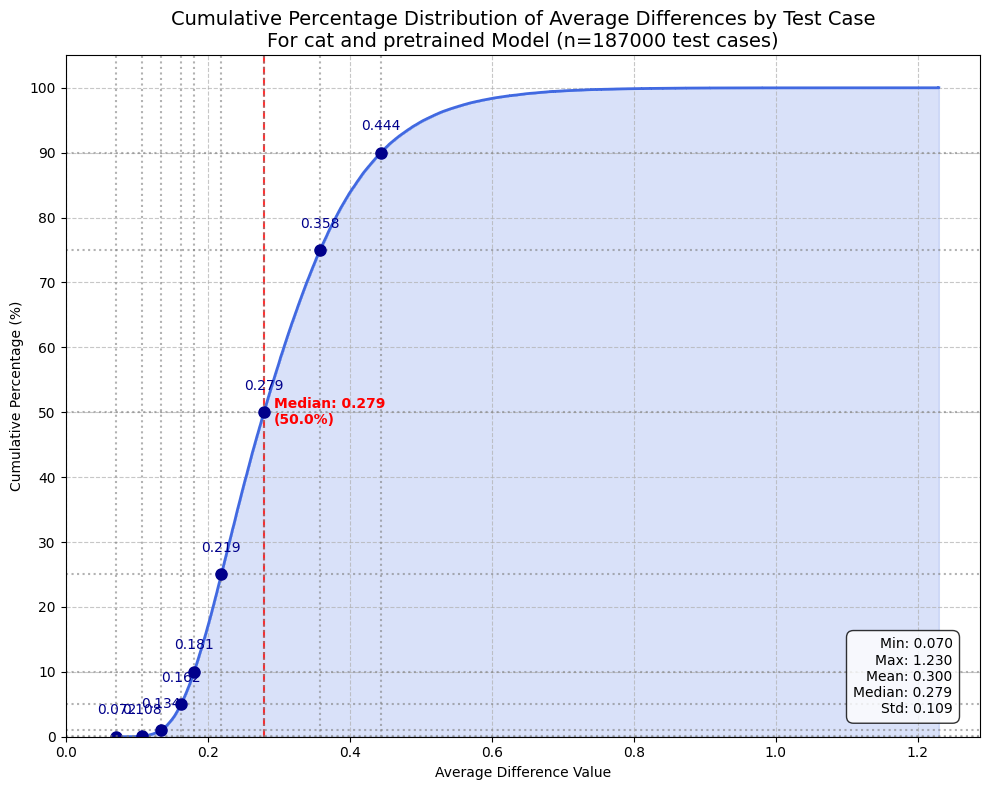

In [29]:
layer_stats_df = pd.read_csv(f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv')

test_case_avg = layer_stats_df.groupby(['image_id', 'round'])['mean_cross_model_difference'].mean().reset_index()

# .mean()    # Average of differences
# .median()  # Median of differences
# .min()     # Minimum difference
# .max()     # Maximum difference
# .std()     # Standard deviation of differences
# .var()     # Variance of differences
# .sum()     # Sum of differences


plt.figure(figsize=(10, 8))

sorted_data = test_case_avg['mean_cross_model_difference'].sort_values()

y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

plt.step(sorted_data, y_values, where='post', color='royalblue', linewidth=2)
plt.fill_between(sorted_data, y_values, alpha=0.2, color='royalblue', step='post')

median_value = sorted_data.median()
median_idx = np.searchsorted(sorted_data, median_value)
median_y = y_values[min(median_idx, len(y_values)-1)]

plt.axvline(x=median_value, color='red', linestyle='--', alpha=0.8)
plt.text(median_value*1.05, 50, f"Median: {median_value:.3f}\n({median_y:.1f}%)", 
        color='red', ha='left', va='center', fontweight='bold')

percentiles = [0.0001,0.1,1,5,10,25, 50, 75, 90]
for pct in percentiles:
    percentile_value = sorted_data.quantile(pct/100)
    plt.axhline(y=pct, color='gray', linestyle=':', alpha=0.6)
    plt.axvline(x=percentile_value, color='gray', linestyle=':', alpha=0.6)
    plt.plot(percentile_value, pct, marker='o', color='darkblue', markersize=8)
    plt.text(percentile_value, pct+3, f"{percentile_value:.3f}", 
            color='darkblue', ha='center', va='bottom')


n_tests = len(sorted_data)

plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'Cumulative Percentage Distribution of Average Differences by Test Case\nFor {classes[the_class]} and {model_info} Model (n={n_tests} test cases)', fontsize=14)
plt.xlabel('Average Difference Value')
plt.ylabel('Cumulative Percentage (%)')
plt.xlim(left=0)  # Start from 0
plt.ylim(0, 105)  # Percentage goes from 0 to 100%

plt.yticks(np.arange(0, 101, 10))


stats_text = (f"Min: {sorted_data.min():.3f}\n"
              f"Max: {sorted_data.max():.3f}\n"
              f"Mean: {sorted_data.mean():.3f}\n"
              f"Median: {median_value:.3f}\n"
              f"Std: {sorted_data.std():.3f}")

plt.text(0.97, 0.03, stats_text, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save plot
save_path = f'{model_info}_model_differences_by_test_case_overall_for_{classes[the_class]}.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

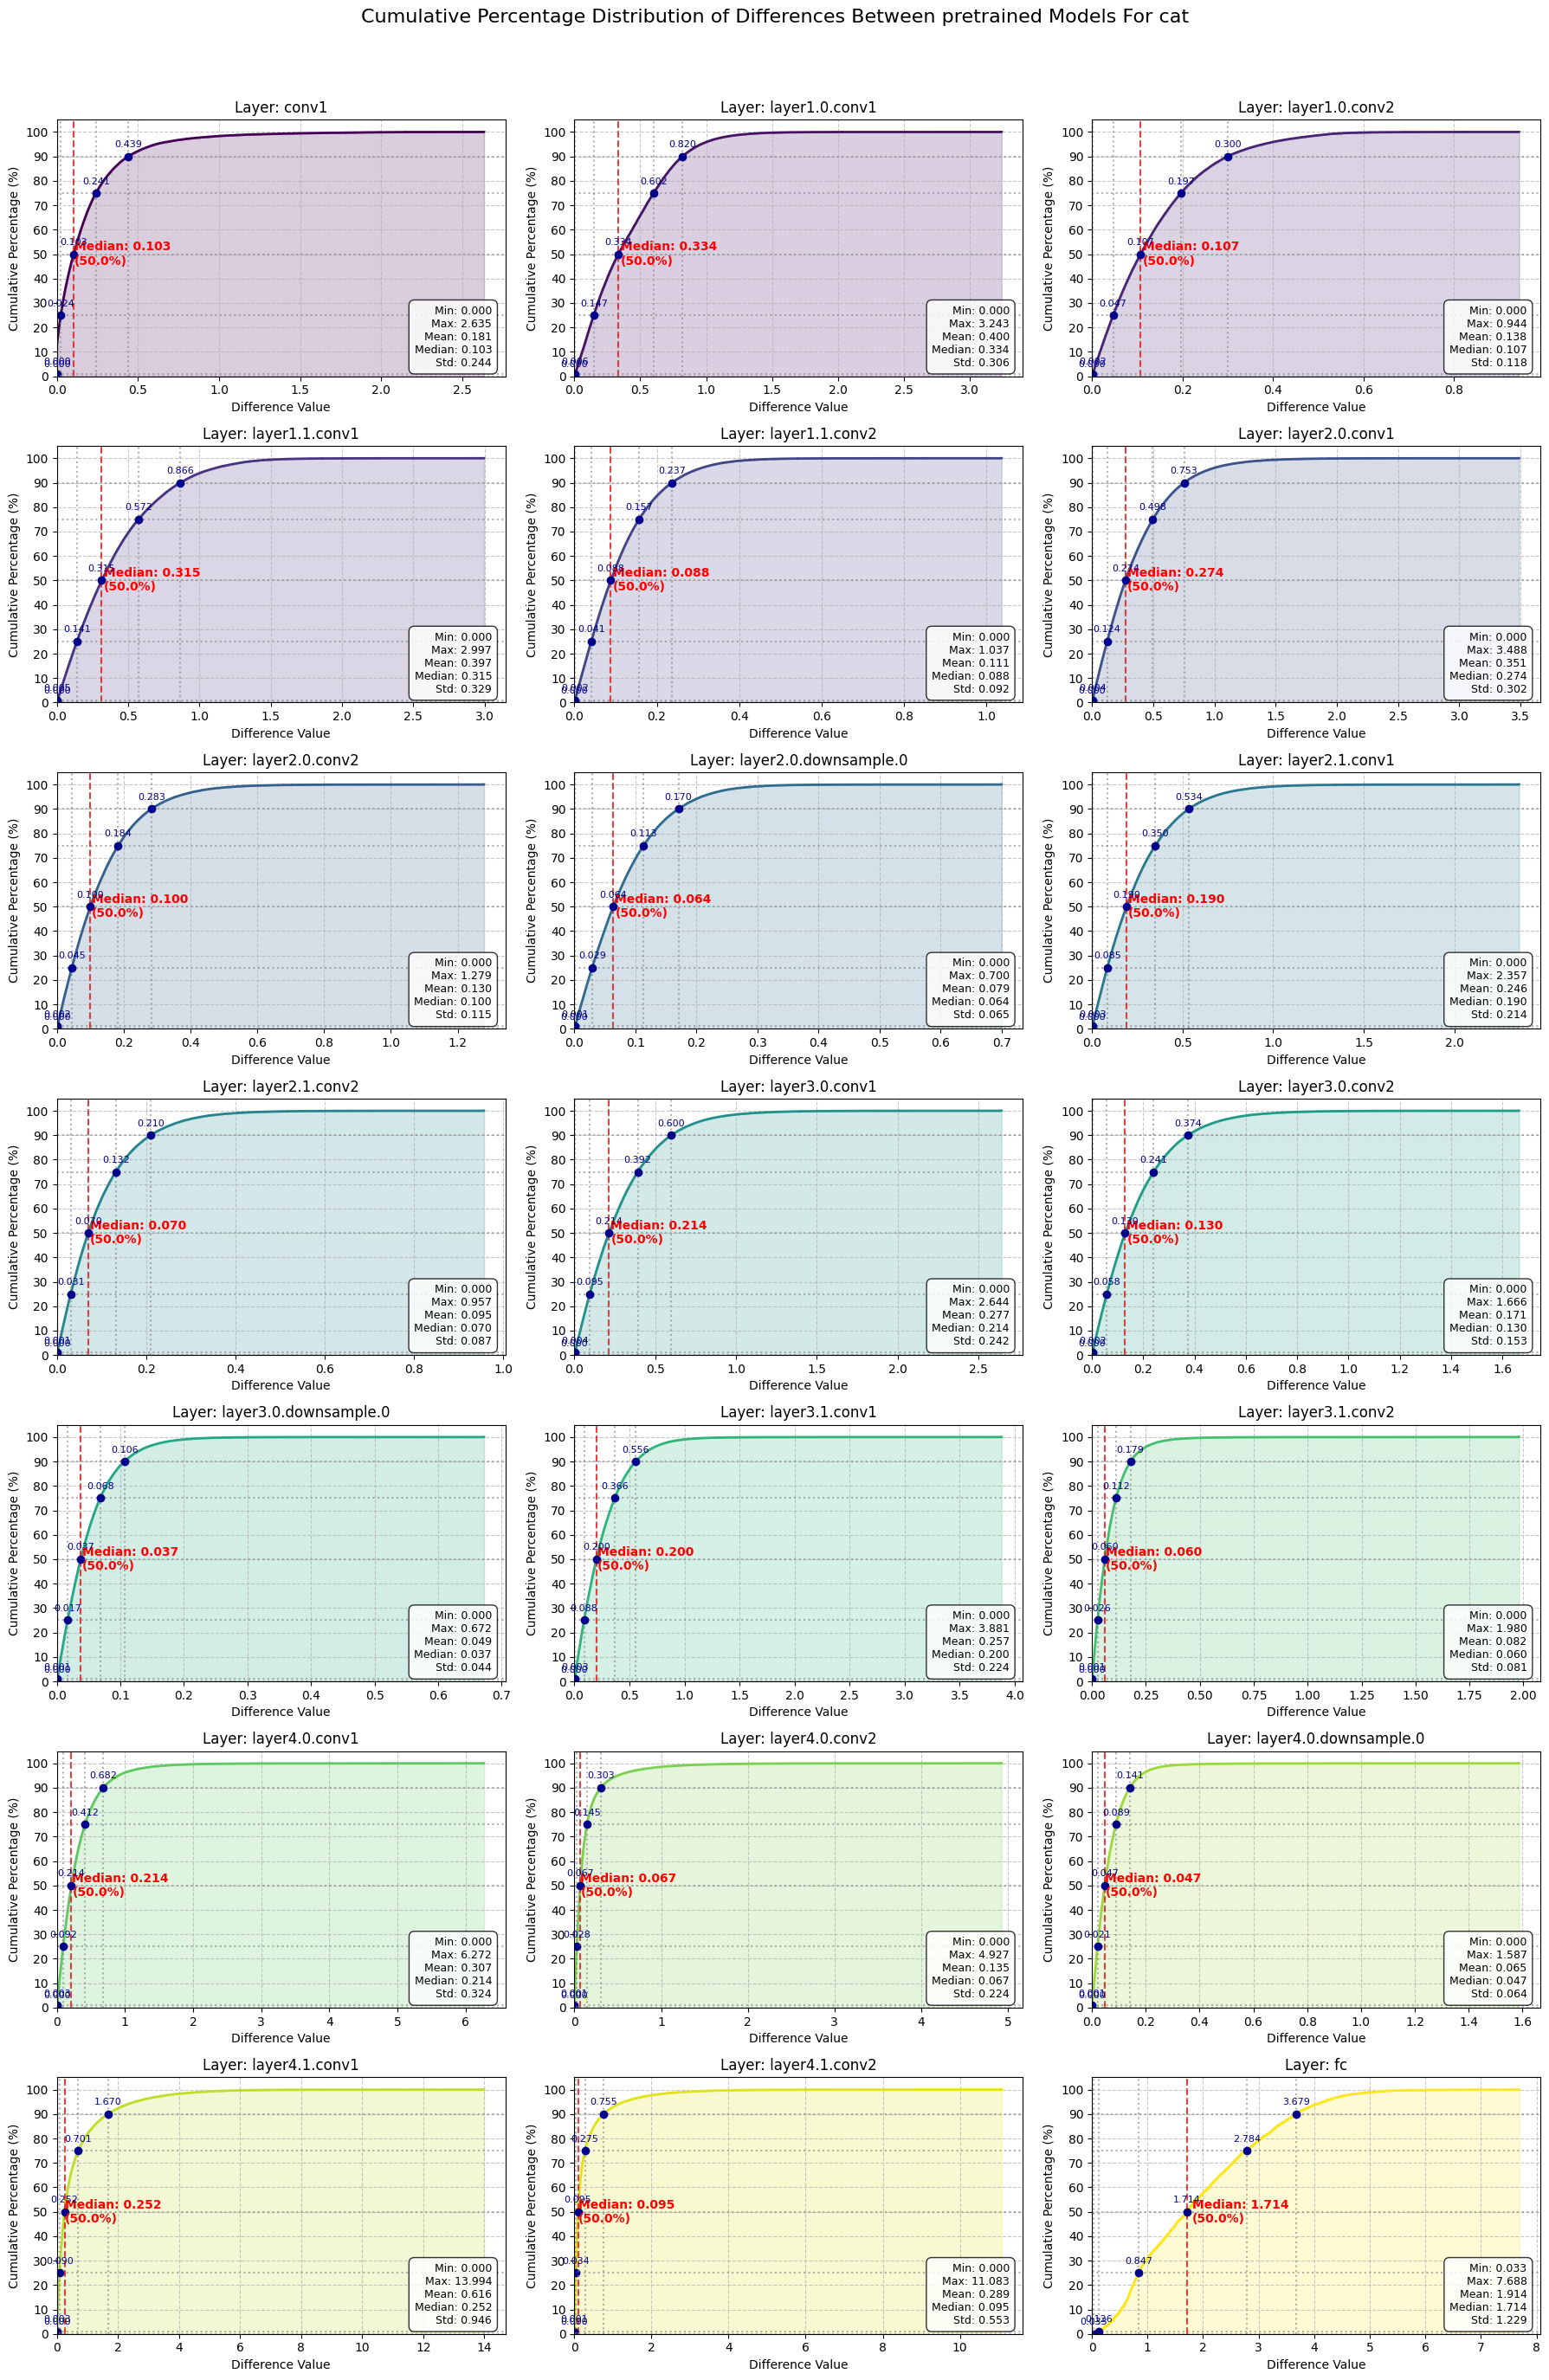

In [25]:
import math

layer_stats_df = pd.read_csv(f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv')
unique_layers = layer_stats_df['layer_name'].unique()
num_layers = len(unique_layers)
n_cols = min(3, num_layers) 
n_rows = math.ceil(num_layers / n_cols)




# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4), squeeze=False)
fig.suptitle(f'Cumulative Percentage Distribution of Differences Between {model_info} Models For {classes[the_class]}', 
             fontsize=16, y=0.98)

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_layers))

# Flatten the axes array for easy indexing
axes_flat = axes.flatten()

# Plot cumulative histogram for each layer in its own subplot
for i, layer in enumerate(unique_layers):
    if i >= len(axes_flat):  # Safety check
        break
        
    ax = axes_flat[i]
    layer_data = layer_stats_df[layer_stats_df['layer_name'] == layer]['mean_cross_model_difference'].sort_values()
    
    # Calculate ECDF values as percentages
    y_values = np.arange(1, len(layer_data) + 1) / len(layer_data) * 100
    
    # Plot the ECDF
    ax.step(layer_data, y_values, where='post', color=colors[i], linewidth=2)
    ax.fill_between(layer_data, y_values, alpha=0.2, color=colors[i], step='post')
    
    # Add median value as a vertical line with text annotation
    median_value = layer_data.median()
    median_idx = np.searchsorted(layer_data, median_value)
    median_y = y_values[min(median_idx, len(y_values)-1)]
    
    ax.axvline(x=median_value, color='red', linestyle='--', alpha=0.8)
    ax.text(median_value*1.05, 50, f"Median: {median_value:.3f}\n({median_y:.1f}%)", 
            color='red', ha='left', va='center', fontweight='bold')
    
    # Add markers at specific percentiles (25%, 50%, 75%, 90%)
    percentiles = [0.001,1,25, 50, 75, 90]
    for pct in percentiles:
        # Find the x value at the specified percentile
        percentile_value = layer_data.quantile(pct/100)
        ax.axhline(y=pct, color='gray', linestyle=':', alpha=0.6)
        ax.axvline(x=percentile_value, color='gray', linestyle=':', alpha=0.6)
        ax.plot(percentile_value, pct, marker='o', color='darkblue', markersize=6)
        ax.text(percentile_value, pct+3, f"{percentile_value:.3f}", 
                color='darkblue', ha='center', va='bottom', fontsize=8)
    
    # Add grid, title, and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Layer: {layer}', fontsize=12)
    ax.set_xlabel('Difference Value')
    ax.set_ylabel('Cumulative Percentage (%)')
    ax.set_xlim(left=0)  # Start from 0
    ax.set_ylim(0, 105)  # Percentage goes from 0 to 100%
    
    # Add percentage y-ticks
    ax.set_yticks(np.arange(0, 101, 10))
    
    # Add statistics table in the corner
    stats_text = (f"Min: {layer_data.min():.3f}\n"
                  f"Max: {layer_data.max():.3f}\n"
                  f"Mean: {layer_data.mean():.3f}\n"
                  f"Median: {median_value:.3f}\n"
                  f"Std: {layer_data.std():.3f}")
    
    ax.text(0.97, 0.03, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Hide any unused subplots
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle

# Save plot
save_path = f'{model_info}_model_differences_cumulative_percent_by_layer_for_{classes[the_class]} and {model_info} Model.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

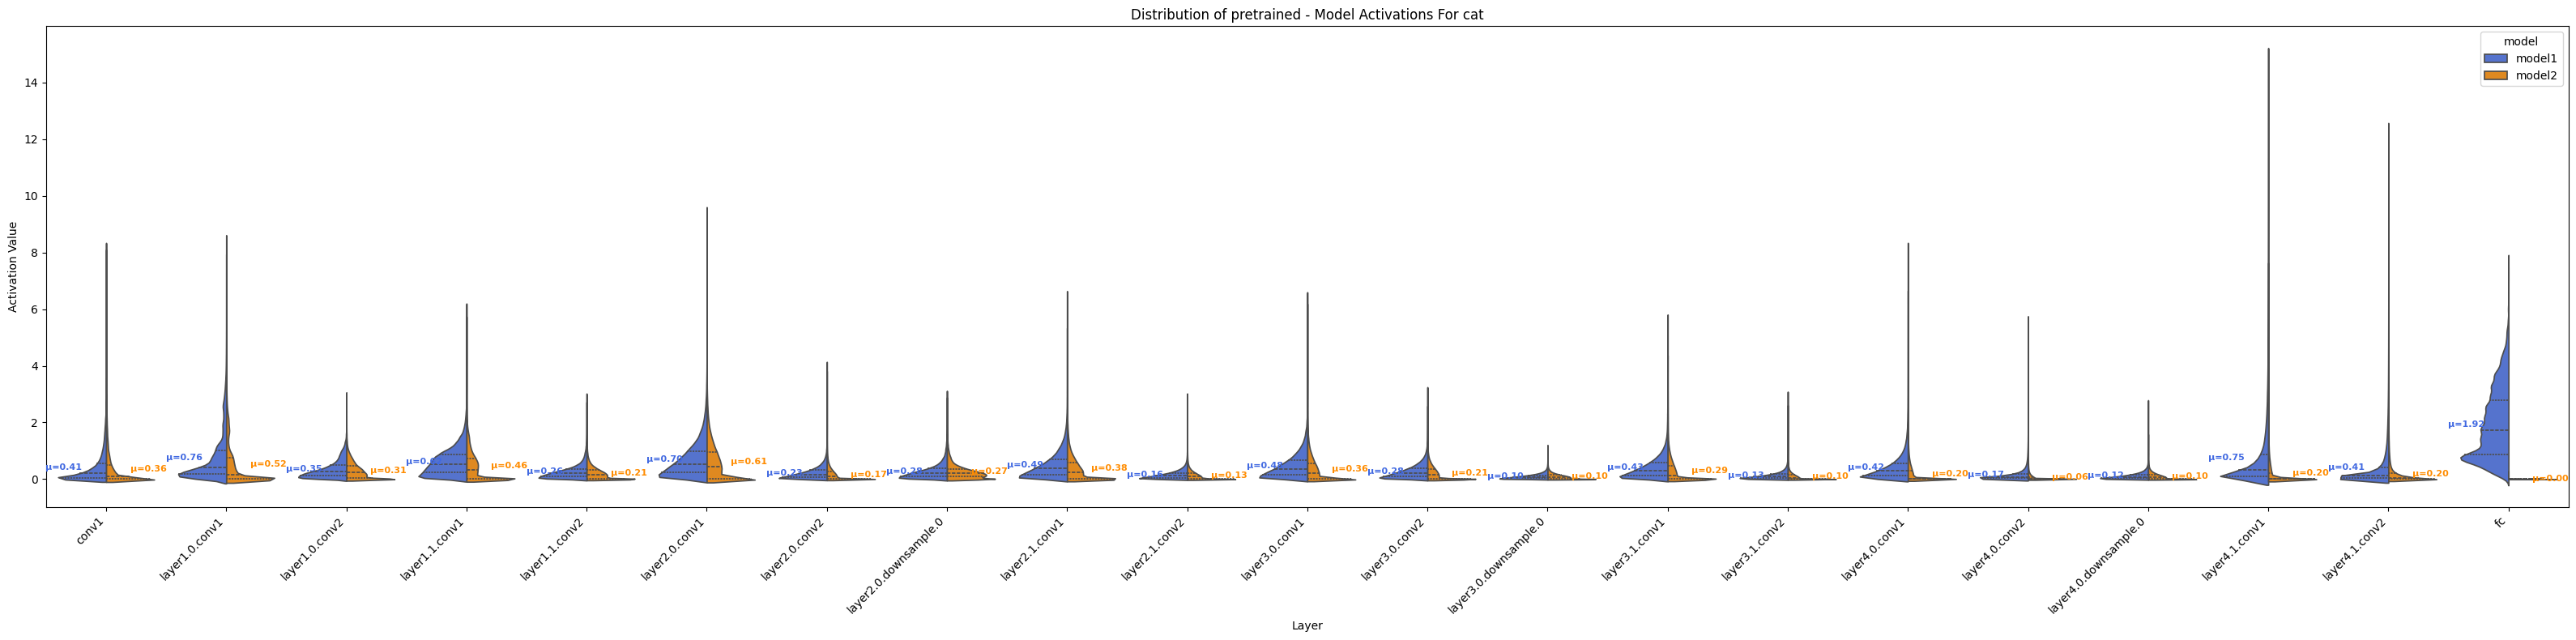

Minimum values for each layer:
conv1: 0.000000e+00
layer1.0.conv1: 0.000000e+00
layer1.0.conv2: 0.000000e+00
layer1.1.conv1: 0.000000e+00
layer1.1.conv2: 0.000000e+00
layer2.0.conv1: 0.000000e+00
layer2.0.conv2: 0.000000e+00
layer2.0.downsample.0: 4.172325e-07
layer2.1.conv1: 0.000000e+00
layer2.1.conv2: 0.000000e+00
layer3.0.conv1: 0.000000e+00
layer3.0.conv2: 0.000000e+00
layer3.0.downsample.0: 2.235174e-08
layer3.1.conv1: 0.000000e+00
layer3.1.conv2: 0.000000e+00
layer4.0.conv1: 0.000000e+00
layer4.0.conv2: 0.000000e+00
layer4.0.downsample.0: 0.000000e+00
layer4.1.conv1: 0.000000e+00
layer4.1.conv2: 0.000000e+00
fc: 3.281350e-02


In [26]:
# Load the data
layer_stats_df = pd.read_csv(f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv')
model1_df = layer_stats_df[['layer_name', 'model1_activation_value']].copy()
model1_df['model'] = 'model1'
if isinstance(model1_df['model1_activation_value'].iloc[0], str):
    model1_df['activation_value'] = model1_df['model1_activation_value'].apply(
        lambda x: float(x.strip('[]')))
else:
    model1_df['activation_value'] = model1_df['model1_activation_value']
model2_df = layer_stats_df[['layer_name', 'model2_activation_value']].copy()
model2_df['model'] = 'model2'
if isinstance(model2_df['model2_activation_value'].iloc[0], str):
    model2_df['activation_value'] = model2_df['model2_activation_value'].apply(
        lambda x: float(x.strip('[]')))
else:
    model2_df['activation_value'] = model2_df['model2_activation_value']

combined_df = pd.concat([
    model1_df[['layer_name', 'model', 'activation_value']],
    model2_df[['layer_name', 'model', 'activation_value']]
])





fig, ax = plt.subplots(figsize=(32, 8))
sns.violinplot(data=combined_df, 
               x='layer_name', 
               y='activation_value',
               hue='model',
               inner='quartile',
               density_norm='width',
               split=True,
               palette={'model1': 'royalblue', 'model2': 'darkorange'})

for i, layer in enumerate(combined_df['layer_name'].unique()):

    model1_data = combined_df[(combined_df['layer_name'] == layer) & 
                             (combined_df['model'] == 'model1')]['activation_value']
    model1_mean = model1_data.mean()
    model1_median = model1_data.median()
    model1_q1 = model1_data.quantile(0.25)
    model1_q3 = model1_data.quantile(0.75)
    
    
    model2_data = combined_df[(combined_df['layer_name'] == layer) & 
                             (combined_df['model'] == 'model2')]['activation_value']
    model2_mean = model2_data.mean()
    model2_median = model2_data.median()
    model2_q1 = model2_data.quantile(0.25)
    model2_q3 = model2_data.quantile(0.75)
    
    
    plt.text(i-0.2, model1_mean, f"μ={model1_mean:.2f}", 
             ha='right', va='center', fontweight='bold', color='royalblue', fontsize=8)
    
    
    plt.text(i+0.2, model2_mean, f"μ={model2_mean:.2f}", 
             ha='left', va='center', fontweight='bold', color='darkorange', fontsize=8)
    
    
    # stats_text = f"Model1: μ={model1_mean:.2f}, M={model1_median:.2f}\nModel2: μ={model2_mean:.2f}, M={model2_median:.2f}"
    # plt.text(i, ax.get_ylim()[0], stats_text, 
    #          ha='center', va='top', fontsize=7, 
    #          bbox=dict(facecolor='white', alpha=0.5, boxstyle='round',pad=0.5))

plt.xticks(rotation=45, ha='right')
plt.title(f'Distribution of {model_info} - Model Activations For {classes[the_class]}')
plt.xlabel('Layer')
plt.ylabel('Activation Value')
#plt.ylim(0, 1e1)  # Adjust as needed

plt.tight_layout()

# Save plot
save_path = f'{model_info}_model_activations_violin_plot_for_{classes[the_class]}.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# # Create a separate plot for the differences
# plt.figure(figsize=(16, 8))
# sns.violinplot(data=layer_stats_df, 
#                x='layer_name', 
#                y='mean_cross_model_difference',
#                inner='quartile',
#                density_norm='area',
#                color='red')

# # Customize plot
# plt.xticks(rotation=45, ha='right')
# plt.title(f'Distribution of Differences Between {model_info} - Models For {classes[the_class]}')
# plt.xlabel('Layer')
# plt.ylabel('Difference')
# #plt.ylim(0, 1e1)  # Adjust as needed

# plt.tight_layout()

# save_path = f'{model_info}_model_differences_violin_plot_for_{classes[the_class]}.png'
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
# plt.show()

print("Minimum values for each layer:")
for layer in layer_stats_df['layer_name'].unique():
    min_value = layer_stats_df[layer_stats_df['layer_name'] == layer]['mean_cross_model_difference'].min()
    print(f"{layer}: {min_value:.6e}")


               layer_name  kl_model1_to_model2  kl_model2_to_model1  \
0                   conv1             0.083594             0.082787   
1          layer1.0.conv1             0.303080             0.352310   
2          layer1.0.conv2             0.132326             0.155685   
3          layer1.1.conv1             0.228317             0.337362   
4          layer1.1.conv2             0.110150             0.144171   
8          layer2.1.conv1             0.145285             0.187171   
7   layer2.0.downsample.0             0.029327             0.031625   
9          layer2.1.conv2             0.112044             0.132690   
5          layer2.0.conv1             0.126521             0.153607   
6          layer2.0.conv2             0.175025             0.213146   
10         layer3.0.conv1             0.180590             0.237661   
11         layer3.0.conv2             0.193278             0.256439   
12  layer3.0.downsample.0             0.096161             0.112436   
13    

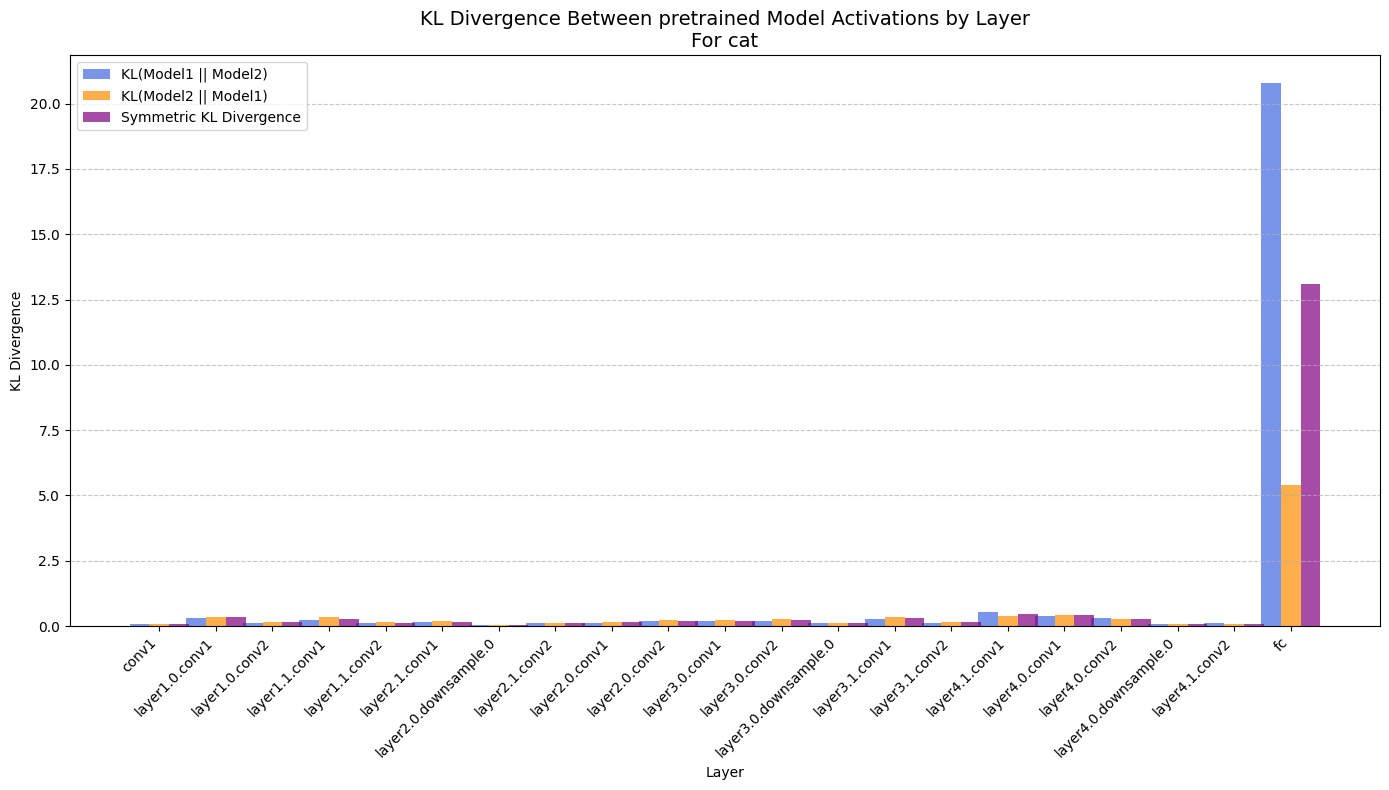

In [27]:
# Load the data
layer_stats_df = pd.read_csv(f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv')

# Process model1 data
model1_df = layer_stats_df[['layer_name', 'model1_activation_value']].copy()
model1_df['model'] = 'model1'
if isinstance(model1_df['model1_activation_value'].iloc[0], str):
    model1_df['activation_value'] = model1_df['model1_activation_value'].apply(
        lambda x: float(x.strip('[]')))
else:
    model1_df['activation_value'] = model1_df['model1_activation_value']

# Process model2 data
model2_df = layer_stats_df[['layer_name', 'model2_activation_value']].copy()
model2_df['model'] = 'model2'
if isinstance(model2_df['model2_activation_value'].iloc[0], str):
    model2_df['activation_value'] = model2_df['model2_activation_value'].apply(
        lambda x: float(x.strip('[]')))
else:
    model2_df['activation_value'] = model2_df['model2_activation_value']

# Combine the dataframes
combined_df = pd.concat([
    model1_df[['layer_name', 'model', 'activation_value']],
    model2_df[['layer_name', 'model', 'activation_value']]
])

# Function to calculate KL divergence between two distributions
def calculate_kl_divergence(p_values, q_values, bins=100, epsilon=1e-10):

    min_val = min(np.min(p_values), np.min(q_values))
    max_val = max(np.max(p_values), np.max(q_values))
    bin_edges = np.linspace(min_val, max_val, bins+1)
    p_hist, _ = np.histogram(p_values, bins=bin_edges, density=True)
    q_hist, _ = np.histogram(q_values, bins=bin_edges, density=True)
    p_hist = p_hist + epsilon
    q_hist = q_hist + epsilon
    p_hist = p_hist / np.sum(p_hist)
    q_hist = q_hist / np.sum(q_hist)
    
    # Calculate KL divergence: sum(p_i * log(p_i / q_i))
    kl = np.sum(p_hist * np.log(p_hist / q_hist))
    
    return kl

# Calculate KL divergence for each layer
unique_layers = combined_df['layer_name'].unique()
kl_results = []

for layer in unique_layers:
    layer_data = combined_df[combined_df['layer_name'] == layer]
    
    model1_values = layer_data[layer_data['model'] == 'model1']['activation_value'].values
    model2_values = layer_data[layer_data['model'] == 'model2']['activation_value'].values
    
    # Calculate KL divergence in both directions
    kl_model1_to_model2 = calculate_kl_divergence(model1_values, model2_values)
    kl_model2_to_model1 = calculate_kl_divergence(model2_values, model1_values)
    
    symmetric_kl = (kl_model1_to_model2 + kl_model2_to_model1)/2
    
    kl_results.append({
        'layer_name': layer,
        'kl_model1_to_model2': kl_model1_to_model2,
        'kl_model2_to_model1': kl_model2_to_model1,
        'symmetric_kl': symmetric_kl
    })

# Convert to DataFrame
kl_df = pd.DataFrame(kl_results)

# Sort by layer name (assuming names have numeric parts like 'layer1', 'layer2', etc.)
try:
    # Extract numeric part from layer name and sort
    kl_df['layer_num'] = kl_df['layer_name'].str.extract('(\d+)').astype(float)
    kl_df = kl_df.sort_values('layer_num').drop('layer_num', axis=1)
except:
    # If extraction fails, sort alphabetically
    kl_df = kl_df.sort_values('layer_name')

# Display the results
print(kl_df)

# Save the results to CSV
kl_df.to_csv(f'{model_info}_KL_divergence_by_layer_for_{classes[the_class]}.csv', index=False)

# Create a bar plot of KL divergence by layer
plt.figure(figsize=(14, 8))

# Plot both directional KL divergences
x = np.arange(len(kl_df))
width = 0.35

plt.bar(x - width, kl_df['kl_model1_to_model2'], width, label='KL(Model1 || Model2)', color='royalblue', alpha=0.7)
plt.bar(x, kl_df['kl_model2_to_model1'], width, label='KL(Model2 || Model1)', color='darkorange', alpha=0.7)
plt.bar(x+width, kl_df['symmetric_kl'], width, label='Symmetric KL Divergence', color='purple', alpha=0.7)

# Add layer names as x-tick labels
plt.xticks(x, kl_df['layer_name'], rotation=45, ha='right')
plt.xlabel('Layer')
plt.ylabel('KL Divergence')
plt.title(f'KL Divergence Between {model_info} Model Activations by Layer\nFor {classes[the_class]}', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig(f'{model_info}_KL_divergence_by_layer_for_{classes[the_class]}.png', dpi=300, bbox_inches='tight')
plt.show()

KL Divergence Results (Aggregated by img_id and round):
KL(Model1 || Model2): 2.2554
KL(Model2 || Model1): 2.1655
Symmetric KL: 2.2105


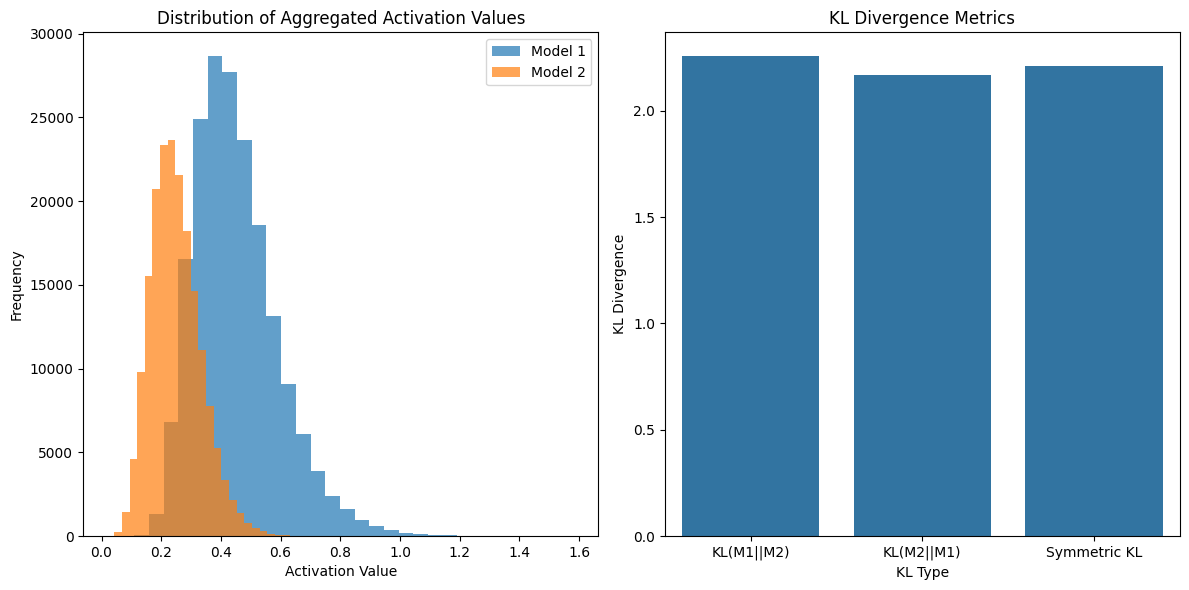

In [28]:
# Load the data
layer_stats_df = pd.read_csv(f'{model_info}_model_random_paths_for_{classes[the_class]}_and_{K_ROUND}_Rounds.csv')

# Convert string representations to float if needed
if isinstance(layer_stats_df['model1_activation_value'].iloc[0], str):
    layer_stats_df['model1_activation_value'] = layer_stats_df['model1_activation_value'].apply(
        lambda x: float(x.strip('[]')))
    
if isinstance(layer_stats_df['model2_activation_value'].iloc[0], str):
    layer_stats_df['model2_activation_value'] = layer_stats_df['model2_activation_value'].apply(
        lambda x: float(x.strip('[]')))

# Directly aggregate by img_id and round
aggregated_df = layer_stats_df.groupby(['image_id', 'round']).agg({
    'model1_activation_value': 'mean',
    'model2_activation_value': 'mean'
}).reset_index()

kl_m1_to_m2 = calculate_kl_divergence(aggregated_df['model1_activation_value'],
                                      aggregated_df['model2_activation_value'])

kl_m2_to_m1 = calculate_kl_divergence(aggregated_df['model2_activation_value'],
                                      aggregated_df['model1_activation_value'])

symmetric_kl = (kl_m1_to_m2 + kl_m2_to_m1)/2


# Print results
print(f"KL Divergence Results (Aggregated by img_id and round):")
print(f"KL(Model1 || Model2): {kl_m1_to_m2:.4f}")
print(f"KL(Model2 || Model1): {kl_m2_to_m1:.4f}")
print(f"Symmetric KL: {symmetric_kl:.4f}")

# Create a histogram to visualize the aggregated activation distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(aggregated_df['model1_activation_value'], bins=30, alpha=0.7, label='Model 1')
plt.hist(aggregated_df['model2_activation_value'], bins=30, alpha=0.7, label='Model 2')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregated Activation Values')
plt.legend()

plt.subplot(1, 2, 2)
data = pd.DataFrame({
    'KL Type': ['KL(M1||M2)', 'KL(M2||M1)', 'Symmetric KL'],
    'Value': [kl_m1_to_m2, kl_m2_to_m1, symmetric_kl]
})
sns.barplot(x='KL Type', y='Value', data=data)
plt.title('KL Divergence Metrics')
plt.ylabel('KL Divergence')

plt.tight_layout()
plt.savefig(f'{model_info}_aggregated_kl_divergence_for_{classes[the_class]}.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the aggregated data and KL results
aggregated_df.to_csv(f'{model_info}_aggregated_activations_for_{classes[the_class]}.csv', index=False)

kl_results_df = pd.DataFrame({
    'metric': ['KL(Model1||Model2)', 'KL(Model2||Model1)', 'Symmetric KL'],
    'value': [kl_m1_to_m2, kl_m2_to_m1, symmetric_kl]
})
kl_results_df.to_csv(f'{model_info}_aggregated_kl_results_for_{classes[the_class]}.csv', index=False)

In [30]:
summary(model_1, (3, 224, 224), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,